# matplotlib-testing

We'll still be looking at the [GMD metrics](https://github.com/chaoss/metrics/blob/master/2_Growth-Maturity-Decline.md)

In [1]:
# import the necessary libraries
import sys
import pandas as pd

from elasticsearch_dsl import A, Q, Search

# utility and support modules
from new_functions import Query, Index, buckets_to_df, calculate_bmi
from derived_classes import  Issues, PullRequests
from pprint import pprint
from datetime import datetime, timezone
from dateutil import parser, relativedelta

import matplotlib.pyplot as plt

In [2]:
# declare the necessary variables

github_data_source = "aima_github"
git_data_source = "aima_git"

github_index = Index(github_data_source)
git_index = Index(git_data_source)

start_date = datetime(2014, 8, 1)
start_date = start_date # "2014-08-01"
end_date = datetime(2018, 5, 22)
end_date = end_date

## Issue Resolution
Goal: Identify how effective the community is at addressing issues identified by community partcipants.

Name | Question | Implemented | Issue | PR | Visualisation 
--- | --- | --- | --- | --- | --- |
[Open Issues](https://github.com/chaoss/metrics/tree/master/activity-metrics/open-issues.md) | What is the number of open issues? | Yes | None | None | No
[Closed Issues](https://github.com/chaoss/metrics/tree/master/activity-metrics/closed-issues.md) | What is the number of closed issues? | Yes | None | None | No
[Issue Resolution Efficiency](https://github.com/chaoss/metrics/tree/master/activity-metrics/issue-resolution-efficiency.md) | What is the number of closed issues/number of abandoned issues? | Yes | [wg-gmd#5](https://github.com/chaoss/wg-gmd/issues/5) | None | No
[Open Issue Age](https://github.com/chaoss/metrics/tree/master/activity-metrics/open-issue-age.md) | What is the the age of open issues? | Yes | None | None | No
[First Response to Issue Duration](https://github.com/chaoss/metrics/tree/master/activity-metrics/first-response-to-issue-duration.md) | What is the duration of time for a first response to an issue? | No | [wg-gmd#8](https://github.com/chaoss/wg-gmd/issues/8) | None | No
[Closed Issue Resolution Duration](https://github.com/chaoss/metrics/tree/master/activity-metrics/closed-issue-resolution-duration.md) | What is the duration of time for issues to be resolved? | Yes | [wg-gmd#7](https://github.com/chaoss/wg-gmd/issues/7) | None | No

### Distribution of issues by month over time

Looking at a monthly distribution of the number of issues created each month and the number of issues closed each month.

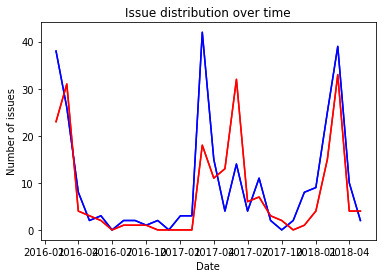

In [11]:
opened_issues = Issues(github_index)
opened_issues_df = opened_issues.get_cardinality("id_in_repo").by_period().get_ts(True)

closed_issues = Issues(github_index)
closed_issues.is_closed()
closed_issues_df = closed_issues.get_cardinality("id_in_repo").by_period(field="closed_at").get_ts(True)
# here the closed_at date is the date when the issue was closed, which is logical when we are looking at distribution
# of issues created/closed per month

remaining_issues = Issues(github_index)
remaining_issues.is_open()
remaining_issues_df = remaining_issues.get_cardinality("id_in_repo").by_period().get_ts(True)

plt.plot(opened_issues_df.index, opened_issues_df['value'], 'b')
plt.plot(opened_issues_df.index, closed_issues_df['value'], 'r')
#plt.plot(opened_issues_df.index, remaining_issues_df['value'], 'g')
plt.xlabel("Date")
plt.ylabel("Number of issues")
plt.title("Issue distribution over time")
plt.show()

In [10]:
remaining_issues_df

,unixtime,value
date,,
2016-03-01 00:00:00+00:00,1.456790e+09,2
2016-04-01 00:00:00+00:00,1.459469e+09,2
2016-05-01 00:00:00+00:00,1.462061e+09,0
2016-06-01 00:00:00+00:00,1.464739e+09,0
2016-07-01 00:00:00+00:00,1.467331e+09,0
2016-08-01 00:00:00+00:00,1.470010e+09,0
2016-09-01 00:00:00+00:00,1.472688e+09,0
2016-10-01 00:00:00+00:00,1.475280e+09,0
2016-11-01 00:00:00+00:00,1.477958e+09,1


In [5]:
opened_issues_df

,unixtime,value
date,,
2016-02-01 00:00:00+00:00,1.454285e+09,38
2016-03-01 00:00:00+00:00,1.456790e+09,26
2016-04-01 00:00:00+00:00,1.459469e+09,8
2016-05-01 00:00:00+00:00,1.462061e+09,2
2016-06-01 00:00:00+00:00,1.464739e+09,3
2016-07-01 00:00:00+00:00,1.467331e+09,0
2016-08-01 00:00:00+00:00,1.470010e+09,2
2016-09-01 00:00:00+00:00,1.472688e+09,2
2016-10-01 00:00:00+00:00,1.475280e+09,1


<a id="closed_issues"></a>
### Closed and open issues

Using plotly, we can design the tables too, which disply the data.

In [ ]:
closed_issues = Issues(github_index)
closed_issues.is_closed()
closed_by_authors = closed_issues.get_cardinality("id_in_repo").by_authors("author_name").fetch_aggregation_results()

opened_issues = Issues(github_index)
opened_by_authors = opened_issues.get_cardinality("id_in_repo").by_authors("author_name").fetch_aggregation_results()

closed_by_author_buckets = closed_by_authors['aggregations']['0']['buckets']
opened_by_author_buckets = opened_by_authors['aggregations']['0']['buckets']

closed_by_author_buckets_df = buckets_to_df(closed_by_author_buckets)
closed_by_author_buckets_df = closed_by_author_buckets_df.rename({"0":"closed_issues"}, axis='columns')
closed_by_author_buckets_df.drop("doc_count", axis=1)
#closed_by_author_buckets_df = closed_by_author_buckets_df.set_index("key", drop=False)


opened_by_author_buckets_df = buckets_to_df(opened_by_author_buckets)
opened_by_author_buckets_df = opened_by_author_buckets_df.rename({"0":"opened_issues"}, axis='columns')
opened_by_author_buckets_df.drop("doc_count",axis=1)
#opened_by_author_buckets_df = opened_by_author_buckets_df.set_index("key", drop=False)

all_issues = pd.merge(opened_by_author_buckets_df, closed_by_author_buckets_df, on="key")
all_issues = all_issues.drop(['doc_count_x', 'doc_count_y'], axis=1)

In [ ]:
table = ff.create_table(all_issues)
iplot(table, filename="Issues_by_authors")

In [ ]:
trace1 = go.Bar(
        y = all_issues.key,
        x = all_issues.closed_issues,
        name = "Closed issues by author",
        orientation = "h",
        marker = dict(
            color = 'rgba(255,50,0, 0.6)'
    )
)

trace2 = go.Bar(
    y = all_issues.key,
    x = all_issues.opened_issues - all_issues.closed_issues,
    name = "Open issues by author",
    orientation = 'h',
    marker = dict(
        color = 'rgba(50, 255, 100, 0.6)')
    )

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    autosize=False,
    width=1200,
    height=800,
    margin=go.Margin(
        l=180,
        r=100,
        b=50,
        t=50,
        pad=4
    )
)


fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='marker-h-bar')

### Issue resolution efficiency

In [ ]:
#  issues closed / issues open per month
opened_issues = Issues(github_index)
opened_issues_by_period = opened_issues.get_cardinality("id_in_repo").since(start_date).until(end_date).by_period().get_ts()
closed_issues_by_period = closed_issues.get_cardinality("id_in_repo").since(start_date).until(end_date).by_period().get_ts()
issues_closed_per_issue_opened = calculate_bmi(closed_issues_by_period, opened_issues_by_period)

# TODO:
# total number of bugs closed during the period / (total number of bugs opened during the period + total number of bugs open at the beginning of the period
# total number of bugs still open at the end of the period / (total number of bugs opened during the period + total number of bugs open at the beginning of the period

<a id="closed_issues"></a>
### open issue age

As per the [discussion here](https://github.com/chaoss/metrics/blob/master/activity-metrics/open-issue-age.md), We'll calculate the percentile, mean, variance and create some visualisations for this metric.

In [ ]:
issue = Issues(github_index)
issue.is_open()
percentiles = issue.get_percentile("time_open_days").get_aggs()
print("Percentiles: ", percentiles)

issue.get_extended_stats("time_open_days")
extended_stats = issue.fetch_aggregation_results()['aggregations']['1']
pprint(extended_stats)

These can be plotted as `BarGraphs` or as a `Linegraph`

In [ ]:
time_open_days_issues = Issues(github_index)
time_open_days_issues.is_open()
time_open_days_df = time_open_days_issues.fetch_results_from_source('time_open_days', 'id_in_repo', dataframe=True)

time_open_days_df = time_open_days_df.sort_values("time_open_days")

bars = go.Bar(x=time_open_days_df.id_in_repo, 
               y=time_open_days_df.time_open_days,
               marker=dict(
                   color = 'rgb(158, 202, 225)',
                   line=dict(
                       color='rgb(8, 48, 107)',
                       width=1.5,
                   )
               ),
              opacity=0.8)

x_list = time_open_days_df.id_in_repo.tolist()

trace = go.Scatter(x=x_list, 
                   y=time_open_days_df.time_open_days,
                   mode="lines+markers")

layout = go.Layout(bargap=0.5)

data = go.Data([bars, trace])

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename="distribution of time that open issues have remained opened")

### Closed issue resolution duration (Time to resolution of closed issue)

#### percentiles

In [ ]:
closed_issues = Issues(github_index)
closed_issues.is_closed()
percentiles = closed_issues.get_percentile("time_to_close_days").get_aggs()
print("Percentiles: ", percentiles)

closed_issues.get_extended_stats("time_to_close_days")
extended_stats = closed_issues.fetch_aggregation_results()['aggregations']['1']
pprint(extended_stats)

#### Moving average
Moving average: For time to issue resolution, we'll also look at the moving average.

In [ ]:
'''
Example query to get moving average 
{
    "size": 0,
    "aggs": {
        "my_date_histo":{                
            "date_histogram":{
                "field":"created_at",
                "interval":"1M"
            },
            "aggs":{
                "the_sum":{
                    "sum":{ "field": "time_to_close_days" } 
                },
                "the_movavg":{
                    "moving_avg":{ "buckets_path": "the_sum" } 
                }
            }
        }
    }
}
'''
closed_issues = Issues(github_index)
closed_issues.is_closed()
a = A("date_histogram", field="created_at", interval="week")
a.metric("the_sum", "sum", field="time_to_close_days")
a.metric("the_avg", "moving_avg", buckets_path="the_sum")
closed_issues.add_custom_aggregation(a)
response = closed_issues.get_average("time_to_close_days").by_period(period="week").fetch_aggregation_results()

In [ ]:
averages = buckets_to_df(response['aggregations']['0']['buckets'])
averages = averages.fillna(0)

In [ ]:
original_values = buckets_to_df(response['aggregations']['1']['buckets'])
original_values = original_values.fillna(0)

In [ ]:
average_plot = go.Scatter(x=averages.index,
                          y=averages.the_avg,
                          name="Monthly Average")

original_values_plot = go.Scatter(x=original_values.index,
                                  y=original_values['0'],
                                  name="Time to close days per month")

data = [average_plot, original_values_plot]
iplot(data)

### from source

In [ ]:
closed_issues = Issues(github_index)
closed_issues.is_closed()
closed_issue_age = closed_issues.fetch_results_from_source('time_to_close_days', 'id_in_repo', dataframe=True)
closed_issue_age['id_in_repo'] = closed_issue_age['id_in_repo'].apply(lambda x: int(x))
closed_issue_age = closed_issue_age.sort_values("id_in_repo")

data = [go.Scatter(x=closed_issue_age.id_in_repo,
                   y=closed_issue_age.time_to_close_days,
                   name="Time to close issue")]

iplot(data)

## Code Development
Goal: Identify how effective the community is at merging new code into the codebase.

Name | Question | Implemented | Issue | PR
--- | --- | --- | --- | --- |
[Code Commits](https://github.com/chaoss/metrics/tree/master/activity-metrics/code-commits.md) | What is the number of code commits? | Yes | None | None
[Lines of Code Changed](https://github.com/chaoss/metrics/tree/master/activity-metrics/lines-of-code-changed.md) | What is the number of lines of code changed? | Yes | None | None
[Code Reviews](https://github.com/chaoss/metrics/tree/master/activity-metrics/code-reviews.md) | What is the number of code reviews?
[Code Merge Duration](https://github.com/chaoss/metrics/tree/master/activity-metrics/code-merge-duration.md) | What is the duration of time between code merge request and code commit?
[Code Review Efficiency](https://github.com/chaoss/metrics/tree/master/activity-metrics/code-review-efficiency.md) | What is the number of merged code changes/number of abandoned code change requests?
[Maintainer Response to Merge Request Duration](https://github.com/chaoss/metrics/tree/master/activity-metrics/maintainer-response-to-merge-request-duration.md) | What is the duration of time for a maintainer to make a first response to a code merge request?
[Code Review Iteration](https://github.com/chaoss/metrics/tree/master/activity-metrics/code-review-iteration.md) | What is the number of iterations that occur before a merge request is accepted or declined?
[Forks](https://github.com/chaoss/metrics/tree/master/activity-metrics/forks.md) | Forks are a concept in distributed version control systems like GitHub. It is a proxy for the approximate number of developers who have taken a shot at building and deploying the codebase *for development*.
[Pull Requests Open](https://github.com/chaoss/metrics/tree/master/activity-metrics/pull-requests-open.md) | Number of open pull requests. | Yes | None | None | 
[Pull Requests Closed](https://github.com/chaoss/metrics/tree/master/activity-metrics/pull-requests-made-closed.md) | Number of closed pull requests. | Yes | None | None |
[Pull Request Comment Duration](https://github.com/chaoss/metrics/tree/master/activity-metrics/pull-requests-comment-duration.md) | The difference between the timestamp of the pull request creation date and the most recent comment on the pull request.
[Pull Request Comment Diversity](https://github.com/chaoss/metrics/tree/master/activity-metrics/pull-requests-comment-diversity.md) | Number of each people discussing each pull request.
[Pull Request Comments](https://github.com/chaoss/metrics/tree/master/activity-metrics/pull-request-comments.md) | Number of comments on each pull request. 


### code commits

**NOTE:** HERE THE INDEX WILL HAVE TO BE CHANGED

In [ ]:
commits = EQCC(git_index)
commits.get_cardinality("hash")
total_commits = commits.get_aggs()
print("total commits: ", total_commits)

all_commits = commits.fetch_results_from_source("hash", "commit_date")

When you go to the [perceval github repo](https://github.com/chaoss/grimoirelab-perceval), you'll see that actually 1182 commit are present. That maybe because of some empty commit messages. 

#### By days with sliding range

In [ ]:
commits_per_month_df = commits.get_cardinality("hash").by_period(period="day").get_ts(dataframe=True)

data = [go.Scatter(x=commits_per_month_df.index,
                  y=commits_per_month_df.value,
                  name="Commits")]
layout = dict(
    title='Commits made per day over the given period of analysis',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date'
    )
)
fig = dict(data=data, layout=layout)
iplot(fig)

## Community Growth
Goal: Identify the size of the project community and whether it's growing, shrinking, or staying the same.

Name | Question | Implemented | Issue | PR
--- | --- | --- | --- | --- |
[Contributors](https://github.com/chaoss/metrics/tree/master/activity-metrics/contributors.md) | What is the number of contributors? | Yes | None | None
[New Contributors](https://github.com/chaoss/metrics/tree/master/activity-metrics/new-contributors.md) | What is the number of new contributors? | Yes | None | None
[Contributing Organizations](https://github.com/chaoss/metrics/tree/master/activity-metrics/contributing-organizations.md) | What is the number of contributing organizations? | Yes | None | None
[New Contributing Organizations](https://github.com/chaoss/metrics/tree/master/activity-metrics/new-contributing-organizations.md) | What is the number of new contributing organizations?
[Sub-Projects](https://github.com/chaoss/metrics/tree/master/activity-metrics/sub-projects.md) | What is the number of sub-projects?

### Number of contributors

In [ ]:
contributors = EQCC(git_index)
lines_changed = contributors.get_sum("lines_changed").by_authors("author_name").fetch_aggregation_results()['aggregations']['0']['buckets']
lines_changed_df = buckets_to_df(lines_changed)
lines_added = contributors.get_sum("lines_added").by_authors("author_name").fetch_aggregation_results()['aggregations']['0']['buckets']
lines_added_df = buckets_to_df(lines_added)
lines_removed = contributors.get_sum("lines_removed").by_authors("author_name").fetch_aggregation_results()['aggregations']['0']['buckets']
lines_removed_df = buckets_to_df(lines_removed)
files_changed = contributors.get_average("files").by_authors("author_name").fetch_aggregation_results()['aggregations']['0']['buckets']
files_changed_df = buckets_to_df(files_changed)

In [ ]:
labels = lines_changed_df.key
values = lines_changed_df['0']

trace = [go.Pie(labels=labels, values=values, 
               hoverinfo='label+percent', textinfo='value',
               textfont=dict(size=20),
               #marker=dict(line=dict(color='#000000', width=1))
        )]
layout = go.Layout(
    autosize=False,
    width=800,
    height=1200,
    margin=go.Margin(
        l=0,
        r=50,
        b=50,
        t=0,
        pad=4
    )
)

fig = go.Figure(data=trace, layout=layout)
iplot(fig, filename="Lines_changed_by_authors")

This piechart might look ugly, for now, but we can maybe plot the major authors in the chart who have substantial contribution to the project and group the smaller players in one category?


In [ ]:
fig = {
  "data": [
    {
      "values": lines_added_df['0'],
      "labels": lines_added_df.key,
      "domain": {"x": [0, .48]},
      "name": "Lines added by authors",
      "hoverinfo":"label+percent",
      "hole": .4,
      "type": "pie",
        
    }],
  "layout": {
      "title":"Lines added by authors over time",
      "autosize":False,
      "width":1200,
      "height":1200,
      "margin":go.Margin(
         l=0,
         r=100,
         b=0,
         t=30,
         pad=4
     )
    }
}

iplot(fig, filename='donut')

#### Comparing lines added vs lines removed per author

And still, if this looks ugly and doesn't work, we can create a horizontal bar graph for the authors as we did above, showing the number of lines changed and removed for each author:

In [ ]:
trace1 = go.Bar(
    y = lines_added_df.key,
    x = lines_added_df['0'],
    name = "Lines added by author",
    orientation = 'h',
    marker = dict(
        color = 'rgba(255, 0, 0, 0.6)')
    )

trace2 = go.Bar(
    y = lines_removed_df.key,
    x = lines_removed_df['0'],
    base = (-1)*lines_removed_df['0'],
    name = "Lines removed by author",
    orientation = 'h',
    marker = dict(
        color = 'rgba(0, 255, 225, 0.6)')
    )
layout = go.Layout(
    barmode="stack",
    autosize=False,
    width=1200,
    height=800,
    margin=go.Margin(
        l=180,
        r=100,
        b=50,
        t=50,
        pad=4
    )
)
data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
iplot(fig)